# ДЗ 1
## Классический МЛ в NLP, вспомнить все!

В этом ДЗ будем работать с датасетом Men_Women_Shoes_Reviews ttps://www.kaggle.com/daishinkan002/men-women-shoes-reviews 
 

### **Задание 1**. 
Предсказать цену по описанию товара (для каждого товара)
### **Задание 2.** 
Предсказать оценку товара пользователем по его отзыву (для каждого отзыва)

## *Что нужно сделать в каждом задании:* 
1) проанализировать данные (все, на что хватит вашей фантазии, хороший анализ включает в себя графики и статистические инструменты анализа, можно приходить с вопросами "какой инструмент поможет мне проверить такую-то гипотезу/хочу посмотреть вот это вот, как это сделать", предварительно не стесняйтесь гуглить) **1 балл**

2) подготовить данные (стемминг, лемматизация, убрать мусор и стоп-слова, нормализовать... все, что покажется вам разумным относительно данных, но вы должны кратко (комментарием к этому блоку кода в тетрадке) объяснить почему вы сделали именно такой препроцессинг. Хороший препроцессинг - разумный, в данном случае чем больше тем не всегда лучше) **1 балла**

3) векторизовать тексты (контекстуальные эммбединги пока что не берем, только BoW и TF-IDF) **0.5 балл**

4) сделать гридсерч по нескольким моделям (у нас 2 задания, классификация и регрессия), подобрать гиперпараметры, выбрать лучшую модель, рассказать, почему, на ваш взгляд,лучший результат показал лучший алгоритм **1 балл**

5) оценить и проанализировать качество лучших решений для каждой задачи (рассказать с чем ваша модель справляется хорошо, а где у нее "слабые места", можно ли как-то улучшить ваши результаты. Хороший анализ сопровождается графиками) **1,5 балла** 

Максимальная сумма баллов при выполнении 5 пунктов в 2 заданиях - 10

В тетрадке с первого занятия много дополнительной информации, которая может вам помочь, но все равно не стесняйтесь приходить с вопросами в чат курса. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import spacy
nlp = spacy.load('en_core_web_md', disable=['ner', 'parser'])

In [2]:
df = pd.read_csv('Shoes_Data.csv')
df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women
1227,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women


### Задание 1

In [3]:
df['price'] = df['price'].apply(lambda x: float(x[1:]))
df['n_symbols_descr'] = df['product_description'].apply(len)
df['n_letters_descr'] = df['product_description'].apply(lambda x: len(x.replace(' ', '')))
df['n_words_descr'] = df['product_description'].apply(lambda x: len(x.split(' ')))
df['mean_word_length_descr'] = df['n_letters_descr'] / df['n_words_descr']
df['n_upper_descr'] = df['product_description'].apply(lambda x: len([a for a in x if a.isupper()]))
df.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,n_symbols_descr,n_letters_descr,n_words_descr,mean_word_length_descr,n_upper_descr
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men,222,188,35,5.371429,9
1,Bourge Men's Loire-z126 Running Shoes,479.0,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men,78,65,14,4.642857,2
2,T-Rock Men's Sneaker,430.0,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,398,328,71,4.619718,7
3,Robbie jones Sneakers Casual Canvas Fabric Col...,499.0,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men,576,477,100,4.770000,100
4,Sparx Men's Sd0323g Sneakers,499.0,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,1030,858,173,4.959538,18


Посмтотрим на зависимость цены от примитивных количественных свойств описания:

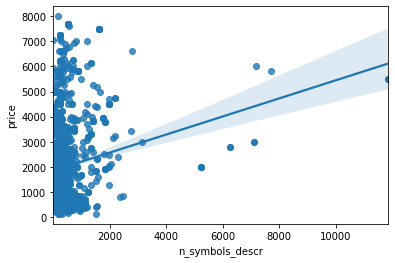

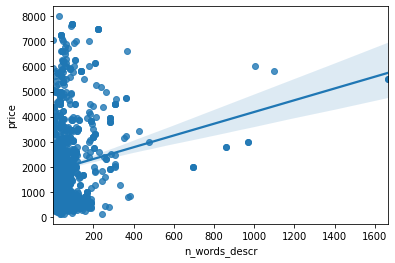

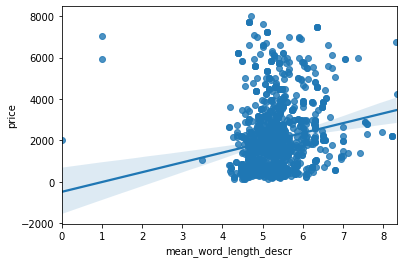

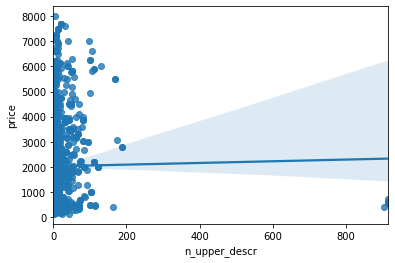

In [192]:
for i in ['n_symbols_descr', 'n_words_descr', 'mean_word_length_descr', 'n_upper_descr']:
    sns.regplot(x=i, y='price', data=df)
    plt.show()

Посмотрим на распределение цен.

Видно, что бОльшая часть товаров находится в ценовом диапазоне до 3000.

<AxesSubplot:>

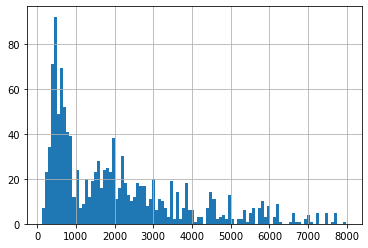

In [223]:
df['price'].hist(bins=100)

Сделаем препроцессинг: лемматизируем слова, уберем пунктуцию, но не будем убирать цифры, так как они могут обозначать название модели.

In [193]:
def preprocess_text(text):
    doc = nlp(text)
    lemmata = [token.lemma_ for token in doc if token.pos_ not in ('PRON', 'PUNCT')]

    return ' '.join(lemmata)

In [194]:
%%time

df['product_description'] = df['product_description'].apply(preprocess_text)

Wall time: 6.46 s


In [92]:
X_train, X_test, y_train, y_test = train_test_split(df['product_description'], df['price'], random_state=42)

In [143]:
%%time

vect = TfidfVectorizer(stop_words='english')
lr = LinearRegression()

pipe = Pipeline([('vect', vect), ('regr', lr)])
param_grid = {
    'vect__max_df': np.linspace(0.1, 1, 10),
    'vect__min_df': np.linspace(0.1, 1, 10).tolist() + [1],
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2)]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print(search.best_estimator_)
mean_absolute_error(search.predict(X_test), y_test)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.6, ngram_range=(1, 2),
                                 stop_words='english')),
                ('regr', LinearRegression())])
Wall time: 29 s


679.2136007458329

In [144]:
%%time

vect = TfidfVectorizer(stop_words='english')
regr = Ridge()

pipe = Pipeline([('vect', vect), ('regr', regr)])
param_grid = {
    'vect__max_df': np.linspace(0.1, 1, 10),
    'vect__min_df': np.linspace(0.1, 1, 10).tolist() + [1],
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2)],
    'regr__alpha': [0.01, 0.1, 1, 10]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print(search.best_estimator_)
mean_absolute_error(search.predict(X_test), y_test)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.4, ngram_range=(1, 3),
                                 stop_words='english')),
                ('regr', Ridge(alpha=0.1))])
Wall time: 1min 35s


533.7767014905328

Минимальная встречаемость слов в `TfidfVectorizer` второй раз устанавливается в 1, поэтому перестаем ее подбирать. Это объяснимо: редкие слова являются хорошими признаками.

In [163]:
%%time

vect = TfidfVectorizer(stop_words='english')
regr = Lasso()

pipe = Pipeline([('vect', vect), ('regr', regr)])
param_grid = {
    'vect__max_df': np.linspace(0.1, 1, 10),
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2)],
    'regr__alpha': [0.01, 0.1, 1, 10]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print(search.best_estimator_)
mean_absolute_error(search.predict(X_test), y_test)

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.6, stop_words='english')),
                ('regr', Lasso(alpha=1))])
Wall time: 7min 41s


692.6836390368527

In [148]:
%%time

vect = TfidfVectorizer(stop_words='english')
regr = RandomForestRegressor(n_estimators=1000)

pipe = Pipeline([('vect', vect), ('regr', regr)])
param_grid = {
    'vect__max_df': np.linspace(0.1, 1, 10),
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2)],
#     'regr__alpha': [0.01, 0.1, 1, 10]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print(search.best_estimator_)
mean_absolute_error(search.predict(X_test), y_test)

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.6, stop_words='english')),
                ('regr', RandomForestRegressor(n_estimators=1000))])
Wall time: 1h 7min 13s


586.671139866605

Лучше всех справилась линейная регрессия с L2-регуляризацией. Попробуем добавить в признаки простые количественные свойства описаний обучим модель с параметрами, найденными из поиска по сетке, и посмотрим, улучшилось ли качество.

Качество незначительно улучшилось.

In [221]:
%%time

train, test = train_test_split(df, random_state=42)
vect = TfidfVectorizer(
    max_df=0.4,
    ngram_range=(1, 3),
    stop_words='english'
    )
X_train = vect.fit_transform(train['product_description'])
X_train = hstack([X_train, train[['n_symbols_descr', 'n_words_descr', 'mean_word_length_descr']].to_numpy()])
X_test = vect.transform(test['product_description'])
X_test = hstack([X_test, test[['n_symbols_descr', 'n_words_descr', 'mean_word_length_descr']].to_numpy()])
y_train = train['price']
y_test = test['price']
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
mean_absolute_error(model.predict(X_test), y_test)

Wall time: 242 ms


521.2686854878192

Нарисуем диаграмму рассеяния предсказний модели и правильных значений.

Модель хорошо предсказывает цены до примерно 3500, после чего начинает ошибаться. Это наталкивает на идею для улучшения: обучить две модели, одну для ценового диапазона до 3500 и другую для диапазона выше. Выбор между ними может осуществлять, например, решающее дерево.

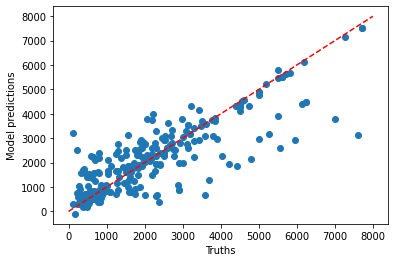

In [222]:
plt.scatter(y_test, model.predict(X_test))
x = np.linspace(0, 8000)
plt.plot(x, x, color='red', ls='--')
plt.ylabel("Model predictions")
plt.xlabel("Truths");

### Задание 2

In [83]:
reviews = []
for i in df['reviews']:
    reviews.extend(i.split('|| '))
ratings = []
for i in df['reviews_rating']:
    ratings.extend(i.split('|| '))
df2 = pd.DataFrame()
df2['review'] = reviews
df2['rating'] = ratings
df2['rating'] = df2['rating'].apply(lambda x: int(x[0]))
df2['is_caps'] = df2['review'].apply(lambda x: x.isupper()).astype(int)
df2['has_caps'] = df2['review'].apply(lambda x: bool([w for w in x.split(' ') if w.isupper()])).astype(int)
df2['has_exclamation'] = df2['review'].apply(lambda x: '!' in x).astype(int)
df2['n_symbols'] = df2['review'].apply(len)
df2['n_letters'] = df2['review'].apply(lambda x: len(x.replace(' ', '')))
df2['n_words'] = df2['review'].apply(lambda x: len(x.split(' ')))
df2['mean_word_length'] = df2['n_letters'] / df2['n_words']
df2['n_upper'] = df2['review'].apply(lambda x: len([a for a in x if a.isupper()]))
df2

,review,rating,is_caps,has_caps,has_exclamation,n_symbols,n_letters,n_words,mean_word_length,n_upper
0,Not happy with product,1,0,0,0,22,19,4,4.750000,1
1,It's not as expected.,1,0,0,0,21,18,4,4.500000,1
2,AVERAGE PRODUCT,3,1,1,0,15,14,2,7.000000,14
3,Pic more beautiful,3,0,0,0,18,16,3,5.333333,1
4,Got damage product. But quality is average for...,3,0,0,0,51,43,9,4.777778,2
...,...,...,...,...,...,...,...,...,...,...
9953,Go for it!,5,0,0,1,10,8,3,2.666667,1
9954,Excellent product,5,0,0,0,17,16,2,8.000000,1
9955,Nice shoe,5,0,0,0,9,8,2,4.000000,1
9956,Nice,5,0,0,0,4,4,1,4.000000,1


Посмотрим на распределение рейтингов.

Рейтинги несбалансированы.

<AxesSubplot:>

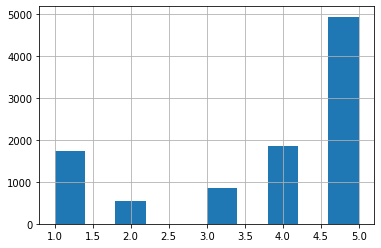

In [261]:
df2['rating'].hist()

Посмтотрим на зависимость рейтинга от примитивных свойств отзыва:

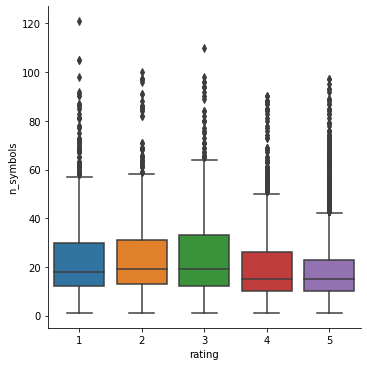

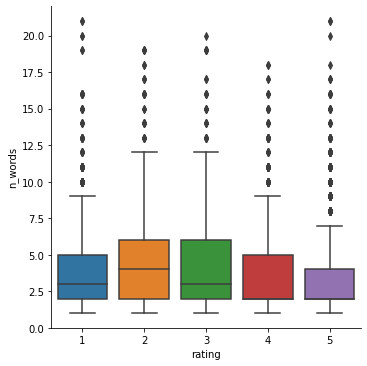

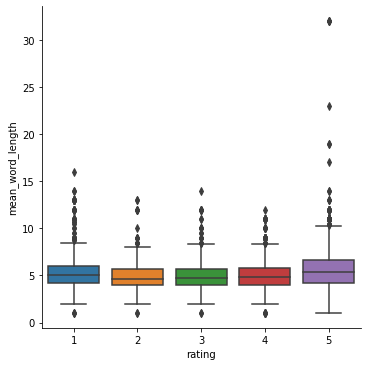

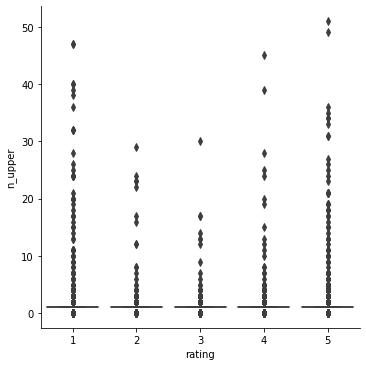

In [262]:
for i in ['n_symbols', 'n_words', 'mean_word_length', 'n_upper']:
    sns.catplot(x='rating', y=i, data=df2, kind='box')
    plt.show()

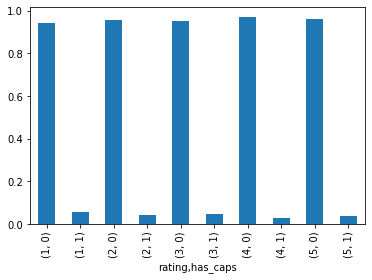

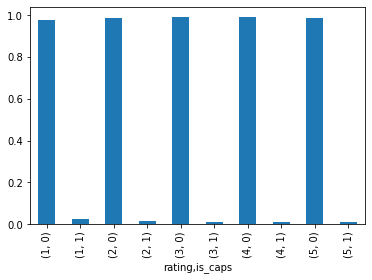

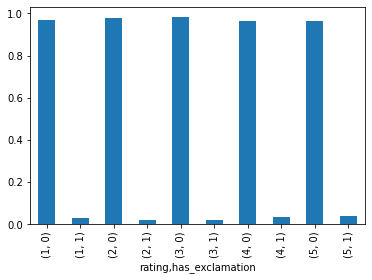

In [28]:
for i in ['has_caps', 'is_caps', 'has_exclamation']:
    df2.groupby('rating')[i].value_counts(normalize=True).plot.bar()
    plt.show()

Сделаем препроцессинг: лемматизируем слова, но не будем убирать пунктуацию, так как она может выражать эмоции.

In [29]:
def preprocess_text(text):
    doc = nlp(text)
    lemmata = [token.lemma_ for token in doc]

    return ' '.join(lemmata)

In [84]:
%%time

df2['review'] = df2['review'].apply(preprocess_text)
df2

Wall time: 14.9 s


,review,rating,is_caps,has_caps,has_exclamation,n_symbols,n_letters,n_words,mean_word_length,n_upper
0,not happy with product,1,0,0,0,22,19,4,4.750000,1
1,it be not as expect .,1,0,0,0,21,18,4,4.500000,1
2,AVERAGE PRODUCT,3,1,1,0,15,14,2,7.000000,14
3,pic more beautiful,3,0,0,0,18,16,3,5.333333,1
4,got damage product . but quality be average fo...,3,0,0,0,51,43,9,4.777778,2
...,...,...,...,...,...,...,...,...,...,...
9953,go for it !,5,0,0,1,10,8,3,2.666667,1
9954,excellent product,5,0,0,0,17,16,2,8.000000,1
9955,nice shoe,5,0,0,0,9,8,2,4.000000,1
9956,nice,5,0,0,0,4,4,1,4.000000,1


In [35]:
train, test = train_test_split(df2, random_state=42)
X_train = train['review']
y_train = train['rating']
X_test = test['review']
y_test = test['rating']

In [11]:
%%time

vect = TfidfVectorizer()
clf = LogisticRegression(max_iter=1000, n_jobs=-1)

pipe = Pipeline([('vect', vect), ('clf', clf)])
param_grid = {
    'vect__stop_words': ['english', None],
    'vect__max_df': np.linspace(0.1, 1, 10),
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': [0.01, 0.1, 1, 10],
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print(search.best_estimator_)
print(classification_report(search.predict(X_test), y_test))

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.2, ngram_range=(1, 3))),
                ('clf', LogisticRegression(C=10, max_iter=1000, n_jobs=-1))])
              precision    recall  f1-score   support

           1       0.76      0.77      0.77       422
           2       0.32      0.64      0.43        66
           3       0.44      0.51      0.47       166
           4       0.24      0.52      0.33       214
           5       0.92      0.73      0.82      1622

    accuracy                           0.70      2490
   macro avg       0.54      0.63      0.56      2490
weighted avg       0.79      0.70      0.73      2490

Wall time: 4min 34s


In [12]:
%%time

vect = TfidfVectorizer()
clf = SVC()

pipe = Pipeline([('vect', vect), ('clf', clf)])
param_grid = {
    'vect__stop_words': ['english', None],
    'vect__max_df': np.linspace(0.1, 1, 10),
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': [0.01, 0.1, 1, 10],
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print(search.best_estimator_)
print(classification_report(search.predict(X_test), y_test))

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.2, ngram_range=(1, 3))),
                ('clf', SVC(C=1))])
              precision    recall  f1-score   support

           1       0.76      0.75      0.76       433
           2       0.25      0.74      0.37        43
           3       0.40      0.56      0.47       138
           4       0.16      0.63      0.26       118
           5       0.97      0.71      0.82      1758

    accuracy                           0.70      2490
   macro avg       0.51      0.68      0.53      2490
weighted avg       0.85      0.70      0.75      2490

Wall time: 5min 19s


In [13]:
%%time

vect = TfidfVectorizer()
clf = RandomForestClassifier(n_estimators=1000)

pipe = Pipeline([('vect', vect), ('clf', clf)])
param_grid = {
    'vect__stop_words': ['english', None],
    'vect__max_df': np.linspace(0.1, 1, 10),
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print(search.best_estimator_)
print(classification_report(search.predict(X_test), y_test))

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.2)),
                ('clf', RandomForestClassifier(n_estimators=1000))])
              precision    recall  f1-score   support

           1       0.75      0.77      0.76       414
           2       0.29      0.60      0.39        63
           3       0.41      0.52      0.46       154
           4       0.22      0.61      0.32       165
           5       0.95      0.72      0.82      1694

    accuracy                           0.70      2490
   macro avg       0.52      0.64      0.55      2490
weighted avg       0.82      0.70      0.74      2490

Wall time: 34min 41s


Логистическая регрессия с L2-регуляризацией, SVM и случайный лес показали одинаковую accuracy. Так как логистическая регрессия обучается быстрее, попробуем улучшить качество ее предсказаний с помощью дополнительных признаков.

In [78]:
%%time

vect = TfidfVectorizer(
    max_df=0.2,
    ngram_range=(1, 3),
)
X_train = vect.fit_transform(train['review'])
X_train = hstack([X_train, train[['is_caps', 'has_caps', 'has_exclamation', 'n_upper']].to_numpy()])
X_test = vect.transform(test['review'])
X_test = hstack([X_test, test[['is_caps', 'has_caps', 'has_exclamation', 'n_upper']].to_numpy()])
y_train = train['rating']
y_test = test['rating']
model = LogisticRegression(
    C=10,
    max_iter=1000,
    n_jobs=-1
)
model.fit(X_train, y_train)
print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           1       0.77      0.76      0.77       427
           2       0.32      0.66      0.43        64
           3       0.44      0.51      0.47       166
           4       0.25      0.53      0.34       215
           5       0.92      0.73      0.82      1618

    accuracy                           0.70      2490
   macro avg       0.54      0.64      0.56      2490
weighted avg       0.79      0.70      0.73      2490

Wall time: 7.32 s


Качество осталось прежним.

Посмотрим на confusion matrix, построенную по предсказниям классификатора. Видно, что модель путает отзывы на 4 и 5: видимо, настроения пользователей, пишущих эти отзывы, похожи. Кроме того, остальные классы также путаются с двумя самыми частотными -- 1 и 5. Для улучшения общего качества нужно обратить больше внимания на малочисленные классы.

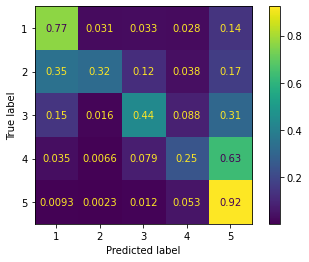

In [81]:
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true')
plt.show()